# 引言

## 1. 声音的产生  
音乐是一种艺术形式和文化活动，其本质有规律的机械波的组合，也叫声波。
 
声音在空气中传播时会引起空气分子有节奏的振动，并将能量传递给相邻的空气分子，这样就产生了声波。 
 

<video controls src="./video/tuning_fork.mp4" />



## 2. 声音的感知

一个健康人的耳朵可以感知到从最低 20Hz - 最高 20,000 Hz 的震动

"The general range of hearing for young people is 20 Hz to 20,000Hz." - *Acoustics. National Physical Laboratory (NPL), 2003.* 

| 物种 | 频率范围(Hz) |
|---|---|
| 狗 | 67-45,000 |
| 猫 | 45-64,000 |
| 牛 | 23-35,000 |


## 3. 声音的记录

早先的录音机叫留声机，诞生于1877年。发明留声机的人就是托马斯·爱迪生。托马斯·爱迪生根据电话传话器里的膜板随着说话声会引起震动的现象，拿短针作了试验，从中得到很大的启发。
 
说话的快慢高低能使短针产生相应的不同颤动。那么，反过来，这种颤动也一定能发出原先的说话声音。于是，他开始研究声音重发的问题。

1877 年8月15日，托马斯·阿尔瓦·爱迪生让助手克瑞西按图样制出一台由大圆筒、曲柄、受话机和膜板组成的怪机器。
 
托马斯·阿尔瓦·爱迪生指着这台怪机器对助手说：”这是一台会说话的机器”，他取出一张锡箔，卷在刻有螺旋槽纹的金属圆筒上，让针的一头轻擦着锡箔转动，另一头和受话机连接。
 
托马斯·阿尔瓦·爱迪生摇动曲柄，对着受话机唱起了“玛丽有只小羊羔，雪球儿似一身毛……”。
 
唱完后，把针又放回原处，轻悠悠地再摇动曲柄。接着，机器不紧不慢、一圈又一圈地转动着，唱起了“玛丽有只小羊羔……”，与刚才托马斯·阿尔瓦·爱迪生唱的一模一样。在一旁的助手们，碰到一架会说话的机器，竟然惊讶得说不出话来。
 

<video controls src="./video/phonograph.mp4" />




后来的发明都是把这样的振动以不同的形式记录，并用扬声器播放出来。
<img src="./img/speaker_module.jpeg" />

所以 CD/MP3 通常采样率都是44.1kHz 或者 48kHz。根据奈奎斯特定理，就足够覆盖我们日常生活中可以听到的频率。
 


<span style="color:#303F9F">
 
所以如果我们想给给朋友家狗狗录一段声音，让它听到音乐觉着非常保真，什么都不会错过，那我们应该选用多少采样率。

A. 90kHz
 
B. 84kHz
 
B. 72kHz
 
B. 64kHz
</span>

In [1]:
print("下面我们来听一段生活中公鸡打鸣的声音")
import IPython
IPython.display.Audio("./audio/rooster-crowing.wav")


下面我们来听一段生活中公鸡打鸣的声音


In [2]:
from scipy.io import wavfile

print("使用 Python 加载文件数据")
# import sounddevice as sd
# from utility.transform import *
sample_rate, rooster_crowing = wavfile.read('./audio/rooster-crowing.wav')
print("这段声音的采样率是:", str(sample_rate))


使用 Python 加载文件数据
这段声音的采样率是: 44100


<IPython.core.display.Javascript object>


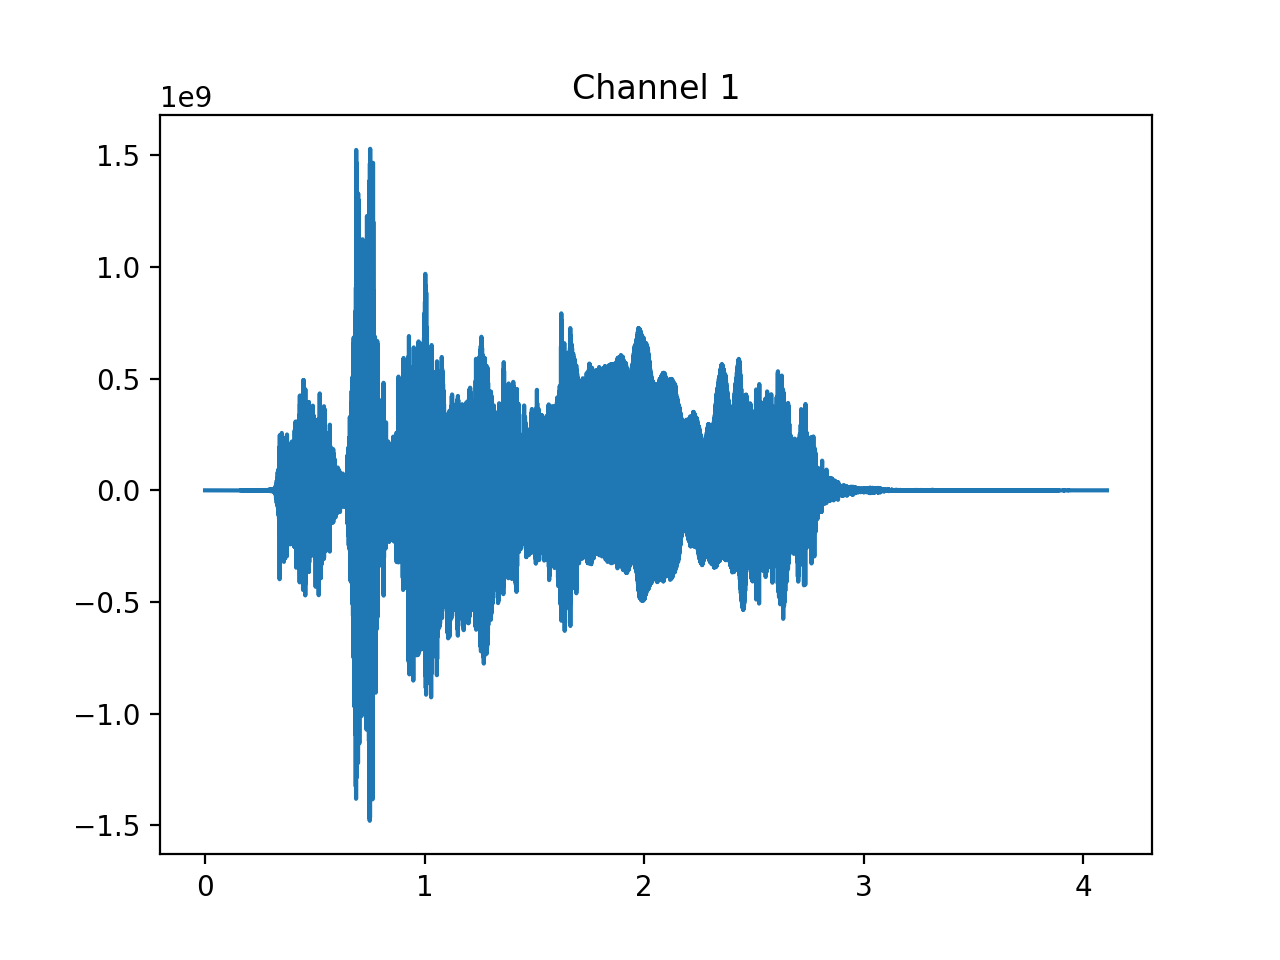

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

t = np.array(range(len(rooster_crowing)))/sample_rate

plt.title("Channel 1")
plt.plot(t, rooster_crowing[:, 0])

<IPython.core.display.Javascript object>


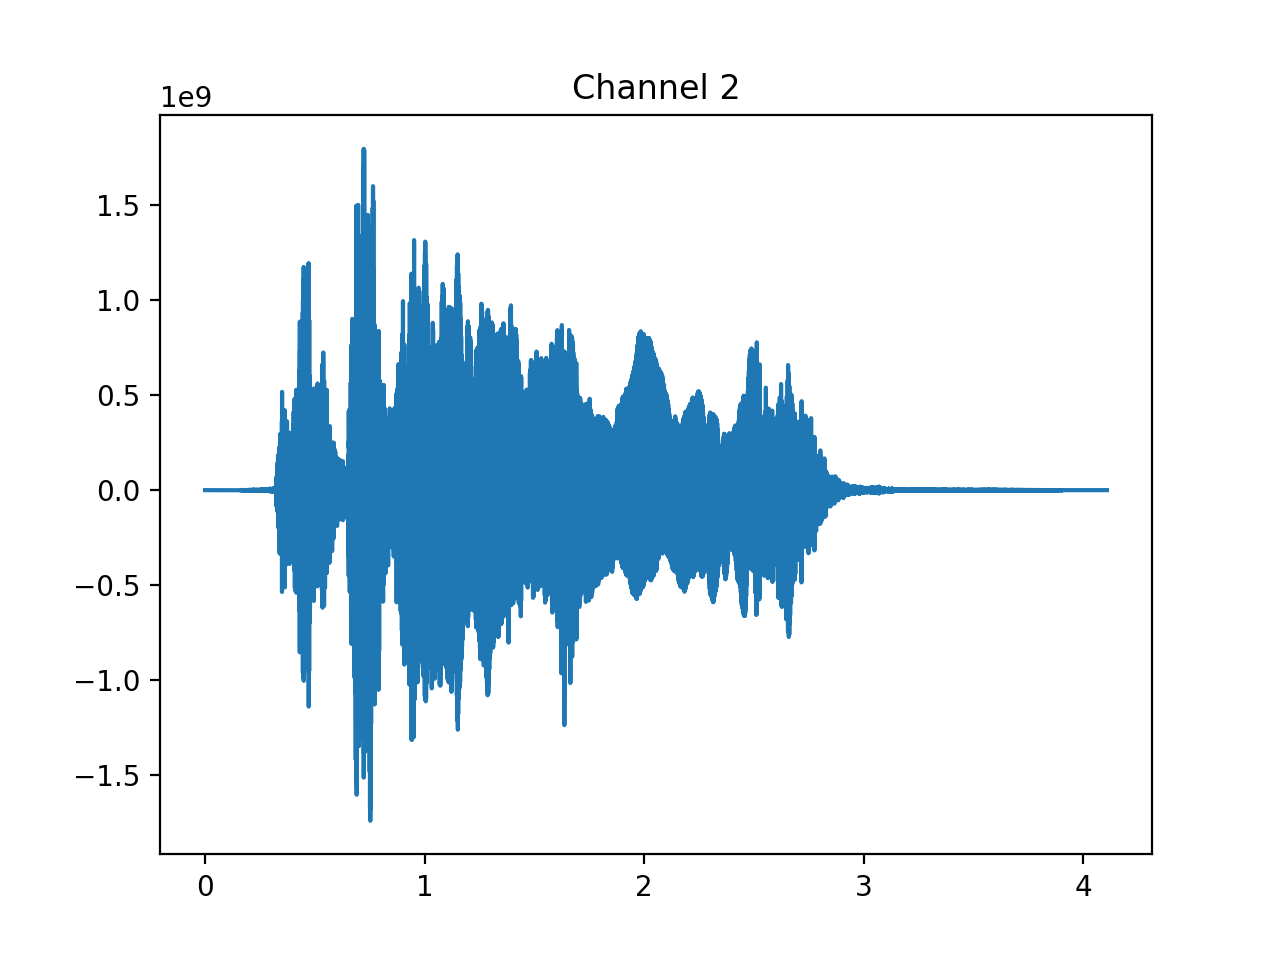

In [4]:
plt.figure()
plt.title("Channel 2")
plt.plot(t, rooster_crowing[:, 1])

In [7]:
print("下面我们把这个画图方法抽象成为一个函数方便我们后面使用")

def plot_audio(signal, fs):
    plt.figure()
    plt.xlabel("Time")
    t = np.array(range(len(signal)))/fs
    plt.plot(t, signal)


下面我们把这个画图方法抽象成为一个函数方便我们后面使用


In [8]:
fs = 8000      # 设置一个采样率
duration = 3   # 播放时长


A random signal played by the speaker is basically noise.

<IPython.core.display.Javascript object>


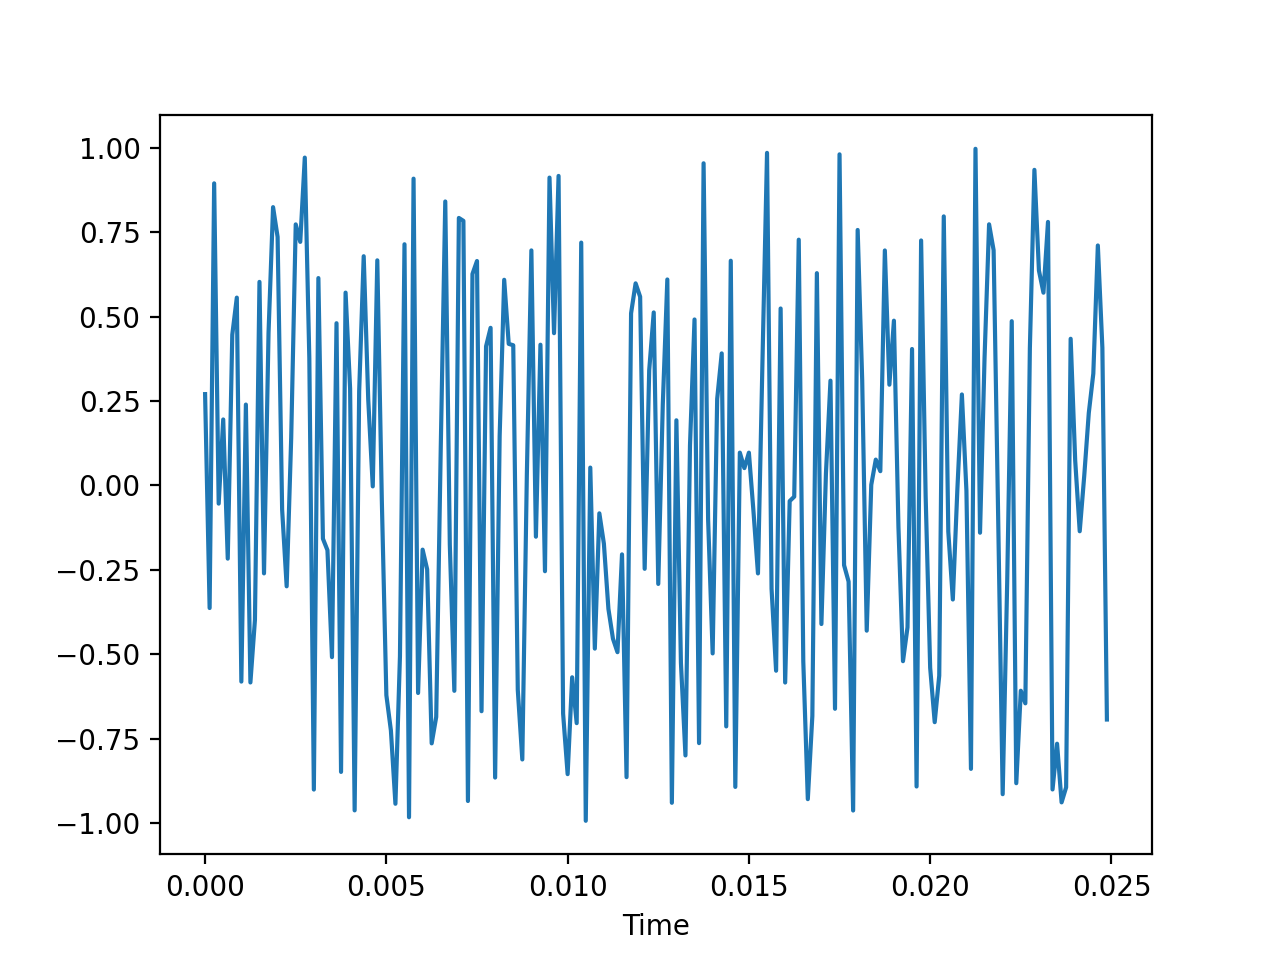

In [9]:
# 用 random 函数生成白噪音
noise = np.random.uniform(-1, 1, fs * duration)
plot_audio(noise[1000:1200], fs)

In [13]:
print("下面我们听听看这段声音什么样")
import sounddevice as sd
sd.play(noise, fs)

下面我们听听看这段声音什么样


下面我们来生成一个中音 A


<IPython.core.display.Javascript object>


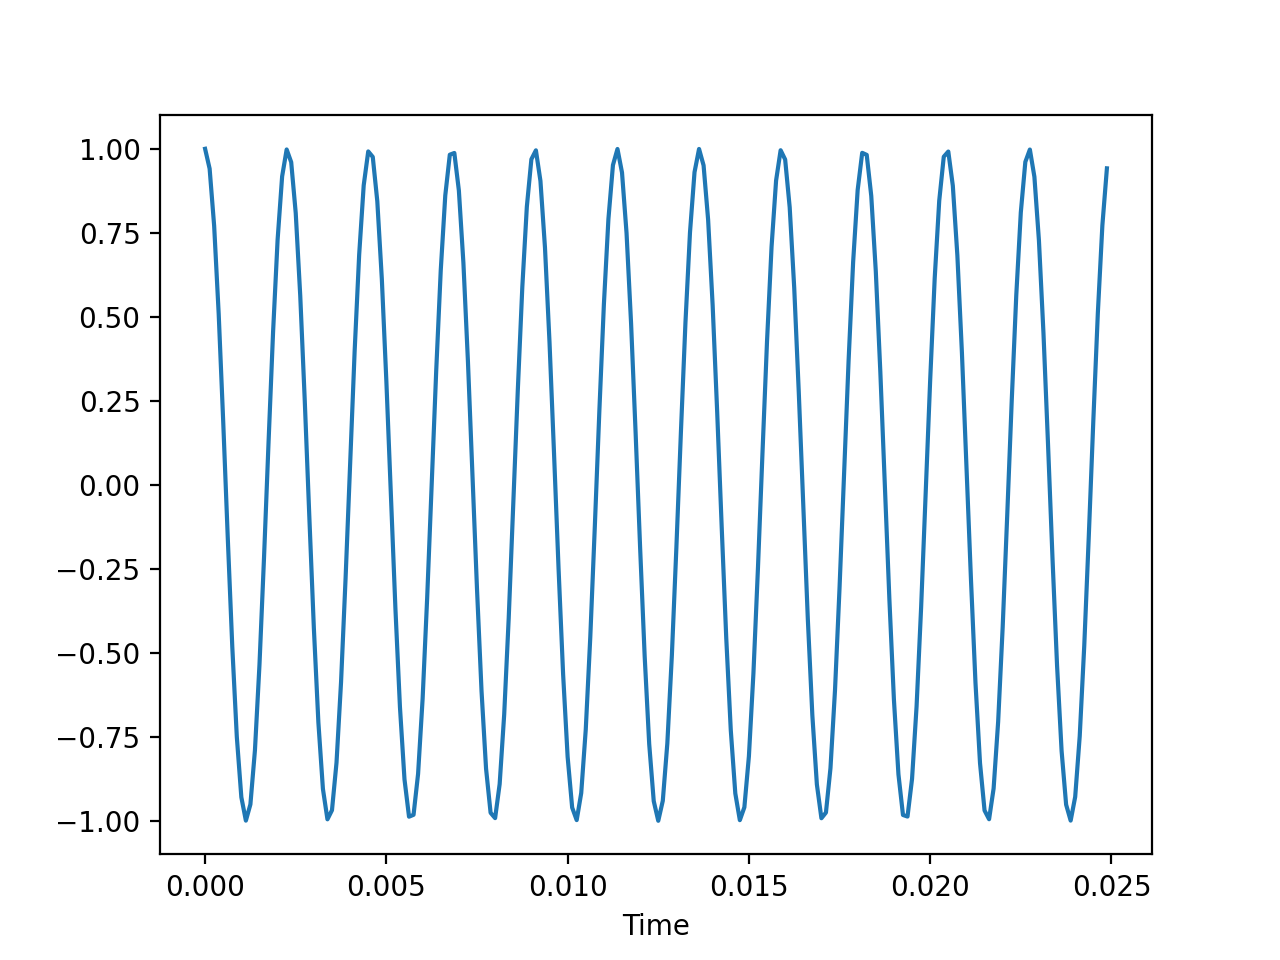

In [14]:
print("下面我们来生成一个中音 A")
A_freq = 440
t = np.linspace(0, duration, fs * duration)
note_A = np.cos(2 * np.pi * A_freq * t)  #  cos(2*pi*f*t)
plot_audio(note_A[:200], fs)

sd.play(note_A, fs)

下面我们来看一下中音A的频率


<IPython.core.display.Javascript object>


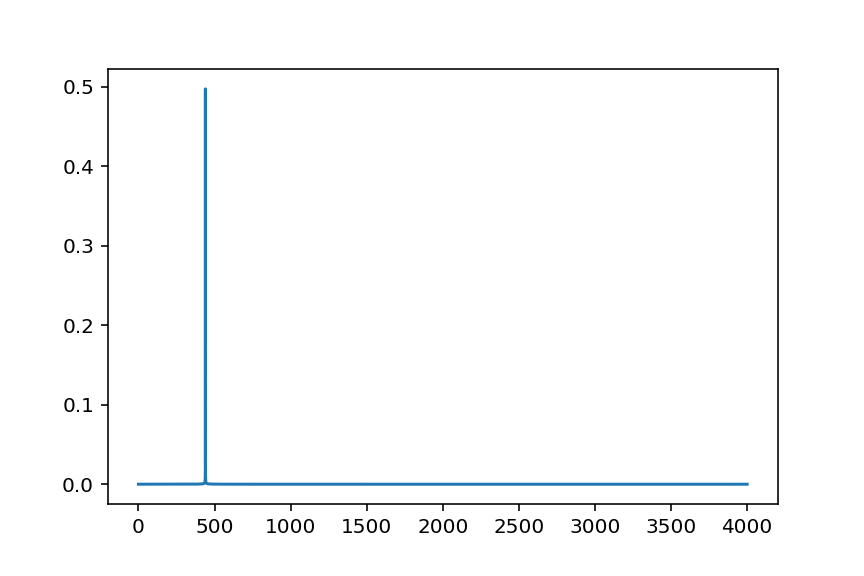

In [65]:
print("下面我们来看一下中音A的频率")
from utility.transform import *

f, spectrum = fft_1sided(note_A, fs)
plt.title("Note A freq")
plt.figure()
plt.plot(f, spectrum)

# 音调和音色
一段声音中，音调是由最大的主频决定的

<IPython.core.display.Javascript object>


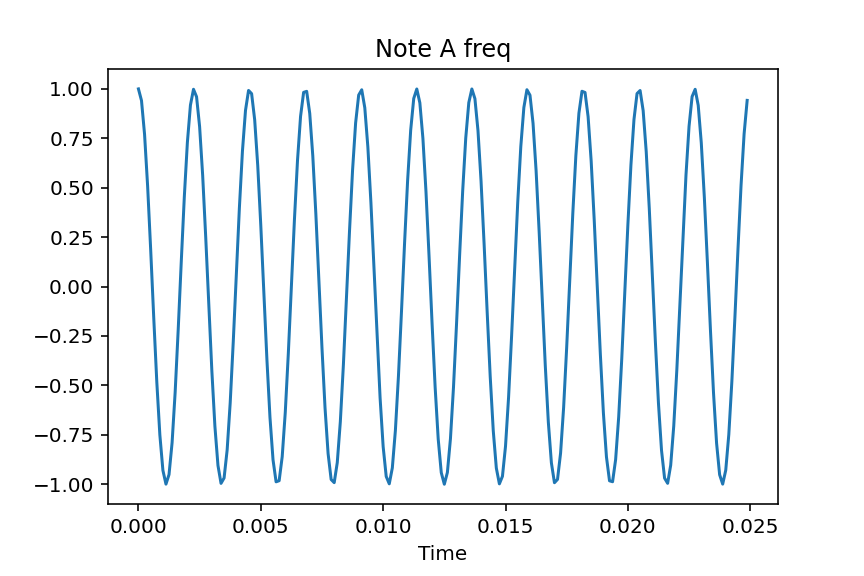

下面是高音A的频域信号


<IPython.core.display.Javascript object>


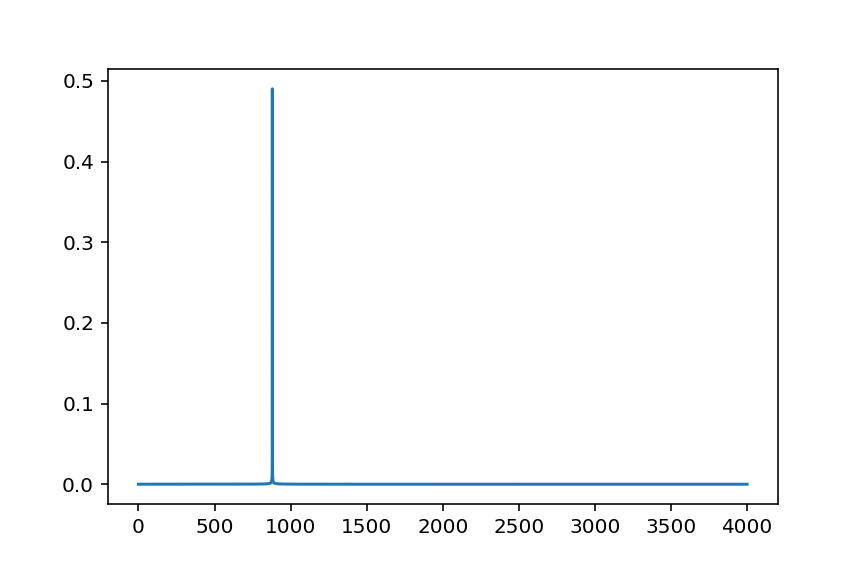

In [66]:
high_A_freq = 880
note_high_A = np.cos(2 * np.pi * high_A_freq * t)  #  cos(2*pi*f*t)
sd.play(note_high_A, fs)

plot_audio(note_A[:200], fs)

print("下面是高音A的频域信号")
f, high_A_fft = fft_1sided(note_high_A, fs)
plt.title("Note A freq")
plt.figure()
plt.plot(f, high_A_fft)


这里是来自一台钢琴的低音A频域信号

<img src="./img/piano_spectrum_a3.png" />

In [ ]:
## 数字合成音乐
最后我们模仿上面的频谱，来手动数字合成一个钢琴的声音。
观察这段信号:
1. 主要的信号间隔都一样，都是主频信号的整数倍
2. 每个主频周围还有一些小的能量

<IPython.core.display.Javascript object>


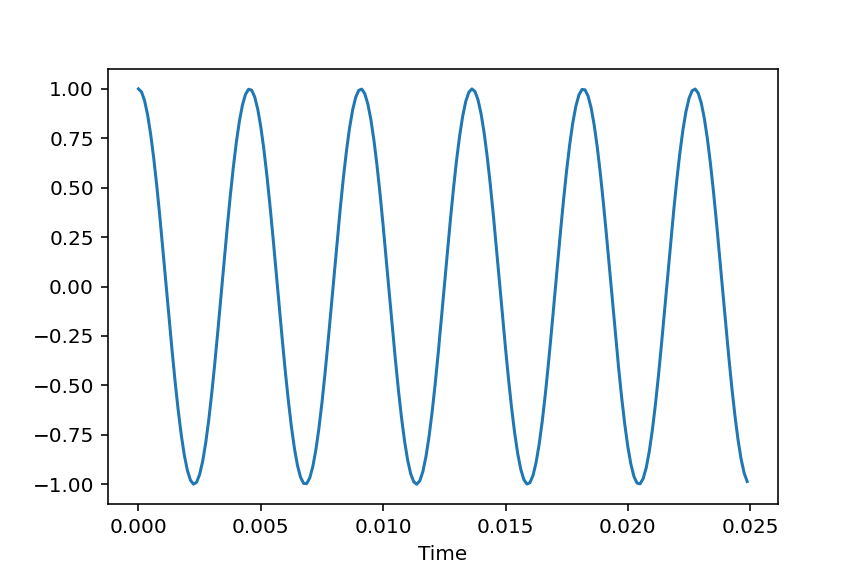

In [151]:
# 1. 首先我们做一个主频
dominate_freq = 220
note_A_piano = np.cos(2 * np.pi * dominate_freq * t)
sd.play(note_A_piano, fs)
plot_audio(note_A_piano[:200], fs)


<IPython.core.display.Javascript object>


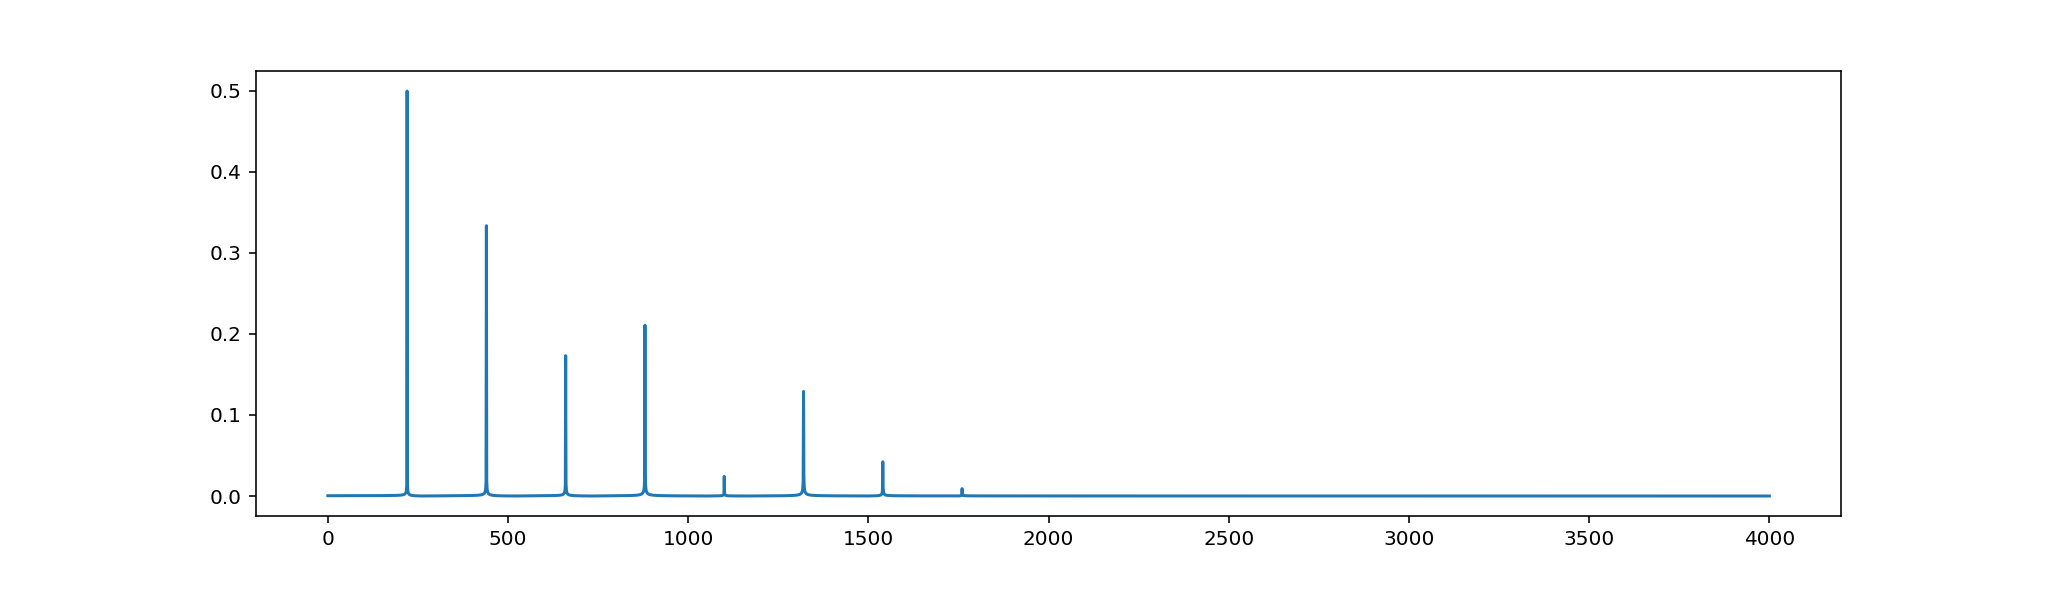

In [152]:
# 2. 然后我们做一些修饰
decorations = [0.67, 0.35, 0.43, 0.05, 0.27, 0.09, 0.02]
t = np.linspace(0, duration, fs * duration)

note_A_piano = np.cos(2 * np.pi * dominate_freq * t)

for i in range(len(decorations)):
    decor_freq = dominate_freq * (i + 2)
    note_A_piano += decorations[i] * np.cos(2 * np.pi * decor_freq * t)


sd.play(note_A_piano, fs)
f, spectrum = fft_1sided(note_A_piano, fs)
plt.figure()
plt.plot(f, spectrum)

现在我们把上面写好的假钢琴变成一个函数。

```Python
def create_sound(f, duration):
    note_t = np.linspace(0, duration, fs * duration)
    note = np.cos(2 * np.pi * f * note_t)  # 主音
    decorations = [0.67, 0.35, 0.43, 0.05, 0.27, 0.09, 0.02] # 倍频修饰
    for i in range(len(decorations)):
        decor_freq = f * (i + 2)
        note += decorations[i] * np.cos(2 * np.pi * decor_freq * note_t)
    return note
```
